   # MACHINE LEARNING ALGORITHMS INDIVIDUAL COURSE WORK

# 1. Introduction

The main goal of this task is to create a model which predicts "spam" or "not spam" more accurately. There are multiple words and their frequencies. The task requires us to model the relationship between words and spam, not spam. This is a Classification task that requires a comparison of Ensemble and Neural Network models. A standard machine learning pipeline should be followed. In this task there will be EDA and Preprocessing, splitting select/train datasets, applying, evaluating and presentation of the models using different ensemble techniques, and one neural network method. Hyper-parameters for each model will be described. Comparing the performance of models. From an innovational perspective, XGBoost Classifier has been explored which has not been covered in the module. Performance scores will be compared with cross-validation and confusion matrix methods. For each method, all metrics will be explained.

## Importing Libraries and Uploading Datasets <a name="introduction"></a>
Uploading given documents "spambase.names" and "spambase.data".

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing

In [4]:
with open('spambase.names') as f:
    list_contents = f.readlines()
    list_colnames = []
    for item in list_contents:
        colname = item.split(':')[0]
        list_colnames.append(colname)
list_colnames.append('label')

In [5]:
df_dataset = pd.read_csv('spambase.data', header=None)
df_dataset.columns = list_colnames

# 2. Exploratory Data Analysis-EDA <a name="DataExploration"></a>

Anlyzing dataframe to summarize main feauters, data visualizations, statistical graphics. The goal is create better uderstanding of our data and create insights about the data set.

In [ ]:
df_dataset.head()

In [ ]:
df_dataset.describe()

In [ ]:
df_dataset.isnull().sum().any()

In [ ]:
df_dataset.nunique()

In [ ]:
df_dataset['label'].unique()

In [127]:
df_dataset.columns

58

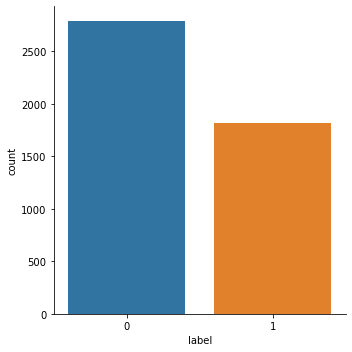

In [6]:
sb.catplot(kind='count', 
           data=df_dataset,
           x='label')

In [13]:
df_dataset['label'].value_counts()

0    2788
1    1813
Name: label, dtype: int64

In the case of training models with unbalancing data, model can show serious biases. The main thing we trying to do in our model is understand what inputs affect the label (spam or not). The model trained with more spam data will more likely to give spam output. Balancing can be required.

In [ ]:
sns.barplot(x='label', y='word_freq_make', data = df_dataset)

In [ ]:
sns.barplot(x='label', y='word_freq_money', data = df_dataset)

In [ ]:
sns.barplot(x='label', y='word_freq_mail', data = df_dataset)

In [ ]:
sns.barplot(x='label', y='word_freq_meeting', data = df_dataset)

# 2.2 Correlation

Correlation is very important metric to understand the level of relation between features in the dataset. As we can see from the "correlation" function, 'word_freq_415' feature shows high correlation with dataset. High correlated features nearly have the same chance to predict output. Removing on of the correlated variable can increase learning process; decrease the complexity of the alghoritm and error risks.


In [7]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)-1):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                #next, decide which feature to drop. We compare the feature corr with target
                if abs(corr_matrix.iloc[j, len(corr_matrix.columns)-1]) > abs(corr_matrix.iloc[i, len(corr_matrix.columns)-1]):
                    colname = corr_matrix.columns[i]
                else:
                    colname = corr_matrix.columns[j]
                col_corr.add(colname)
    return col_corr

In [8]:
corr_features = correlation(df_dataset, 0.90)
print(corr_features)
print('number of corr features: '+str(len(set(corr_features))))

{'word_freq_415'}
number of corr features: 1


In [ ]:
plt.figure(figsize=(60, 50))
ax=sb.heatmap(df_dataset.corr(),linewidths=1,annot=True, fmt=".2",cmap=sb.cm.rocket_r)
ax.tick_params(axis='x', labelrotation=200)

None of the given features were highly correlated with other variables. There was only one feature correlated but in this tast we decieded to not to include model testing with less numbers of feautures.

# 3. Data Pre-Processing

The feauter scaling techniqeu StandartScaler used to scale all feauters around the mean with standart deviation. Some of the feauters can be sclaed different others. This techniqeu creat a consistent format.

In [11]:
from sklearn.preprocessing import StandardScaler

scaled_inputs = StandardScaler().fit_transform(x)

# 4. Feature Engineering and Feature Selection


This is the process of independent and dependent variables defined. None of the given features were highly correlated with other variables. This is why "drop", "delete", "pop" didn't used in this task.  

x (independent) variable going to be our "Input" and y (dependent) variable going to be our "Output". Dependent variable descibe mail spam or not spam with binary method. Independent variables are frequency of words used in the mail.  

The goal is creating models describes the relationship between inputs and output.

In [10]:
x=df_dataset.drop(['label'],axis=1)
y=df_dataset['label']

# 5. Split Train and Test Datasets

The reason splitting a dataset into training and testing subsets is unbiasedly validate how accurate the model is. It is not really efficient to score the model with the data model alredy trained. The the data will be splitted before training of the model. Then in the prediction and validation processes, test data will be used.

Test size define what percentage of dataset we wanna split for testing. Randomization during splitting defined as "random_state". We also splited a different train-test data set with scaled data.

In [14]:
from sklearn.model_selection import train_test_split
# train- test split with scaled dataset
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, y, test_size=0.3, random_state=42)

# Unscaled dataset
x_train_unscaled, x_test_unscaled, y_train_unscaled, y_test_unscaled = train_test_split(x, y, test_size=0.3, random_state=42)

In [15]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (3220, 57)
y_train shape: (3220,)
x_test shape: (1381, 57)
y_test shape: (1381,)


# 6. Train ML Models

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from tensorflow import keras
import numpy as np
import tensorflow as tf

2023-01-18 02:09:48.839228: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
#from sklearn.model_selection import cross_val_score
#from sklearn.tree import DecisionTreeClassifier
#from keras.wrappers.scikit_learn import KerasClassifier

## 6.1 Random Forest

Random forests is supervised machine learning method for classification (as it is in our problem), regression and other tasks. In classification problems, the output of the classifier is selected by majority of the trees.  

The goal is comparison of the default parameters vs grid search. The change on accuracy score should show us the importance of the grid search in case of getting the best possible solution. After than, accuracy of Random Forest will be compared with other ML models.  
  


###   A. Random Forest- Hyper Parameter Tuning

n_estimators.: It is coming from 'how many trees in the forest'.  
bootstrap.: If it is "False" it shows that all data set used otherwise it sampled. "true" is default.  
max_features.: Max feauters given to the each tree. "sqrt" is the default feature.  
min_sample_split.: At least, how many samples/observations are needed to separate any node. "2" is default.  
min_samples_leaf.: After splitting, at least how many samples needed in leaf node. "1" is default min sample size.  
max_depth.: Maximum lenght of tree in the forest. If it is "none" which is default, it grows until all   leaves contain less than min_samples_split samples.  

max_leaf_nodes.: It is about splitting nodes in the tree and arrange separately growth of the tree.

In [17]:
rf = RandomForestClassifier()

parameters_rf = {
#    'n_estimators': [25, 50, 100, 500],
#    'bootstrap': [True, False],
#    'max_features': ["log2", "auto","sqrt"],
#    'min_samples_split': range(2,10,1),    
#    'min_samples_leaf': range(1,10,1),
#    'max_depth': range(2,20,1),
    
    'n_estimators': [25, 50, 100],
    'bootstrap': [True, False],
    'max_features': ["log2", "auto",],
    'min_samples_split': range(2,4,1),    
    'min_samples_leaf': range(1,4,1),
    'max_depth': range(2,200,10),
             }

grid_search_rf = GridSearchCV(estimator = rf, 
                           param_grid = parameters_rf, 
                           cv = 5, 
                           n_jobs = -1, 
                           verbose = 3)

model_rf=grid_search_rf.fit(x_train, y_train)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
[CV 3/5] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.857 total time=   0.3s
[CV 5/5] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.884 total time=   0.3s
[CV 4/5] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.877 total time=   0.4s
[CV 3/5] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.866 total time=   0.8s
[CV 2/5] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=25;, score=0.885 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=25;, score=0.873 total time=   0.2s
[CV 2/5] END bootstrap=True,

[CV 1/5] END bootstrap=True, max_depth=22, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=25;, score=0.938 total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=22, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=25;, score=0.927 total time=   0.3s
[CV 5/5] END bootstrap=True, max_depth=22, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=25;, score=0.949 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=22, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.919 total time=   0.4s
[CV 2/5] END bootstrap=True, max_depth=22, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.941 total time=   0.9s
[CV 1/5] END bootstrap=True, max_depth=22, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.939 total time=   0.3s
[CV 4/5] END bootstrap=True, max_depth=22, max_features=auto, min_samples_leaf=1, min_s

[CV 4/5] END bootstrap=True, max_depth=22, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.943 total time=   0.6s
[CV 3/5] END bootstrap=True, max_depth=22, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.930 total time=   1.0s
[CV 2/5] END bootstrap=True, max_depth=22, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=25;, score=0.938 total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=22, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.936 total time=   0.5s
[CV 5/5] END bootstrap=True, max_depth=22, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.949 total time=   0.5s
[CV 4/5] END bootstrap=True, max_depth=22, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.944 total time=   0.9s
[CV 3/5] END bootstrap=True, max_depth=22, max_features=auto, min_samples_leaf=1, min_

[CV 2/5] END bootstrap=True, max_depth=22, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.943 total time=   1.0s
[CV 5/5] END bootstrap=True, max_depth=22, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.946 total time=   1.0s
[CV 4/5] END bootstrap=True, max_depth=22, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.949 total time=   0.5s
[CV 3/5] END bootstrap=True, max_depth=22, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.929 total time=   1.0s
[CV 2/5] END bootstrap=True, max_depth=22, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.943 total time=   0.2s
[CV 5/5] END bootstrap=True, max_depth=22, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.949 total time=   0.2s
[CV 4/5] END bootstrap=True, max_depth=22, max_features=auto, min_samples_leaf=1, min

[CV 1/5] END bootstrap=True, max_depth=42, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.944 total time=   0.8s
[CV 5/5] END bootstrap=True, max_depth=42, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.953 total time=   0.8s
[CV 4/5] END bootstrap=True, max_depth=42, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.950 total time=   1.5s
[CV 4/5] END bootstrap=True, max_depth=42, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=25;, score=0.947 total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=42, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.938 total time=   0.8s
[CV 1/5] END bootstrap=True, max_depth=42, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.938 total time=   1.3s
[CV 5/5] END bootstrap=True, max_depth=42, max_features=auto, min_samples_leaf=2, min_

[CV 2/5] END bootstrap=True, max_depth=42, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.943 total time=   1.2s
[CV 1/5] END bootstrap=True, max_depth=42, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=25;, score=0.935 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=42, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=25;, score=0.936 total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=42, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.939 total time=   0.5s
[CV 5/5] END bootstrap=True, max_depth=42, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.953 total time=   0.5s
[CV 4/5] END bootstrap=True, max_depth=42, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.947 total time=   1.4s
[CV 4/5] END bootstrap=True, max_depth=42, max_features=auto, min_samples_leaf=3, min_

[CV 5/5] END bootstrap=True, max_depth=72, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=25;, score=0.963 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=72, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.925 total time=   0.4s
[CV 2/5] END bootstrap=True, max_depth=72, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.939 total time=   0.9s
[CV 1/5] END bootstrap=True, max_depth=72, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=25;, score=0.938 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=72, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=25;, score=0.936 total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=72, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.939 total time=   0.4s
[CV 5/5] END bootstrap=True, max_depth=72, max_features=log2, min_samples_leaf=2, min_s

[CV 1/5] END bootstrap=True, max_depth=62, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.941 total time=   0.6s
[CV 5/5] END bootstrap=True, max_depth=62, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.944 total time=   0.6s
[CV 4/5] END bootstrap=True, max_depth=62, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.949 total time=   1.1s
[CV 4/5] END bootstrap=True, max_depth=72, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.953 total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=72, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.947 total time=   0.4s
[CV 1/5] END bootstrap=True, max_depth=72, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.953 total time=   0.8s
[CV 5/5] END bootstrap=True, max_depth=72, max_features=log2, min_samples_leaf=1, min_

[CV 2/5] END bootstrap=True, max_depth=72, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.943 total time=   0.4s
[CV 1/5] END bootstrap=True, max_depth=72, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.947 total time=   0.8s
[CV 5/5] END bootstrap=True, max_depth=72, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.952 total time=   0.8s
[CV 4/5] END bootstrap=True, max_depth=72, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.946 total time=   0.4s
[CV 3/5] END bootstrap=True, max_depth=72, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.927 total time=   0.8s
[CV 2/5] END bootstrap=True, max_depth=72, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=25;, score=0.938 total time=   0.2s
[CV 5/5] END bootstrap=True, max_depth=72, max_features=log2, min_samples_leaf=3, min

[CV 2/5] END bootstrap=True, max_depth=72, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.947 total time=   0.4s
[CV 1/5] END bootstrap=True, max_depth=72, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.947 total time=   0.8s
[CV 5/5] END bootstrap=True, max_depth=72, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.957 total time=   0.8s
[CV 4/5] END bootstrap=True, max_depth=72, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.953 total time=   0.4s
[CV 3/5] END bootstrap=True, max_depth=72, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.932 total time=   0.8s
[CV 2/5] END bootstrap=True, max_depth=72, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=25;, score=0.933 total time=   0.2s
[CV 5/5] END bootstrap=True, max_depth=72, max_features=log2, min_samples_leaf=2, min

[CV 1/5] END bootstrap=True, max_depth=92, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.941 total time=   0.4s
[CV 5/5] END bootstrap=True, max_depth=92, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.947 total time=   0.5s
[CV 4/5] END bootstrap=True, max_depth=92, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.944 total time=   0.9s
[CV 4/5] END bootstrap=True, max_depth=92, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=25;, score=0.938 total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=92, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.946 total time=   0.5s
[CV 1/5] END bootstrap=True, max_depth=92, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.943 total time=   1.4s
[CV 5/5] END bootstrap=True, max_depth=92, max_features=log2, min_samples_leaf=3, min_

[CV 4/5] END bootstrap=True, max_depth=112, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=25;, score=0.949 total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=112, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.941 total time=   0.7s
[CV 1/5] END bootstrap=True, max_depth=112, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.936 total time=   1.2s
[CV 5/5] END bootstrap=True, max_depth=112, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.953 total time=   1.1s
[CV 4/5] END bootstrap=True, max_depth=112, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.960 total time=   0.8s
[CV 3/5] END bootstrap=True, max_depth=112, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.939 total time=   1.3s
[CV 2/5] END bootstrap=True, max_depth=112, max_features=auto, min_samples_leaf

[CV 2/5] END bootstrap=True, max_depth=92, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.941 total time=   0.4s
[CV 5/5] END bootstrap=True, max_depth=92, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.955 total time=   0.4s
[CV 3/5] END bootstrap=True, max_depth=92, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.929 total time=   1.0s
[CV 2/5] END bootstrap=True, max_depth=92, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.944 total time=   1.7s
[CV 1/5] END bootstrap=True, max_depth=92, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=25;, score=0.943 total time=   0.5s
[CV 3/5] END bootstrap=True, max_depth=92, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=25;, score=0.936 total time=   0.4s
[CV 1/5] END bootstrap=True, max_depth=92, max_features=auto, min_samples_leaf=1, min_s

[CV 4/5] END bootstrap=True, max_depth=112, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=25;, score=0.944 total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=112, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.943 total time=   0.4s
[CV 1/5] END bootstrap=True, max_depth=112, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.939 total time=   0.9s
[CV 5/5] END bootstrap=True, max_depth=112, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.952 total time=   1.1s
[CV 4/5] END bootstrap=True, max_depth=112, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.955 total time=   0.4s
[CV 3/5] END bootstrap=True, max_depth=112, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.933 total time=   1.0s
[CV 2/5] END bootstrap=True, max_depth=112, max_features=auto, min_samples_leaf

[CV 2/5] END bootstrap=True, max_depth=112, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.939 total time=   0.9s
[CV 1/5] END bootstrap=True, max_depth=112, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=25;, score=0.938 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=112, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=25;, score=0.925 total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=112, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.933 total time=   0.5s
[CV 5/5] END bootstrap=True, max_depth=112, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.950 total time=   0.6s
[CV 4/5] END bootstrap=True, max_depth=112, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.952 total time=   1.2s
[CV 3/5] END bootstrap=True, max_depth=112, max_features=auto, min_samples_leaf=

[CV 1/5] END bootstrap=True, max_depth=112, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.946 total time=   0.6s
[CV 5/5] END bootstrap=True, max_depth=112, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.955 total time=   0.4s
[CV 4/5] END bootstrap=True, max_depth=112, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.955 total time=   1.0s
[CV 4/5] END bootstrap=True, max_depth=112, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=25;, score=0.944 total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=112, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.939 total time=   0.5s
[CV 1/5] END bootstrap=True, max_depth=112, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.939 total time=   1.2s
[CV 5/5] END bootstrap=True, max_depth=112, max_features=auto, min_samples_leaf=

[CV 3/5] END bootstrap=True, max_depth=112, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.925 total time=   0.6s
[CV 2/5] END bootstrap=True, max_depth=112, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.944 total time=   1.0s
[CV 1/5] END bootstrap=True, max_depth=122, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.936 total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=122, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.938 total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=122, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.935 total time=   0.4s
[CV 5/5] END bootstrap=True, max_depth=122, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.952 total time=   0.4s
[CV 4/5] END bootstrap=True, max_depth=122, max_features=log2, min_samples_leaf=1

[CV 3/5] END bootstrap=True, max_depth=142, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.935 total time=   1.0s
[CV 2/5] END bootstrap=True, max_depth=142, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=25;, score=0.944 total time=   0.3s
[CV 5/5] END bootstrap=True, max_depth=142, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=25;, score=0.961 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=142, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.941 total time=   0.6s
[CV 2/5] END bootstrap=True, max_depth=142, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.943 total time=   1.0s
[CV 1/5] END bootstrap=True, max_depth=142, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=25;, score=0.941 total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=142, max_features=log2, min_samples_leaf=

[CV 2/5] END bootstrap=True, max_depth=142, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.936 total time=   0.5s
[CV 1/5] END bootstrap=True, max_depth=142, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.947 total time=   1.1s
[CV 5/5] END bootstrap=True, max_depth=142, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.964 total time=   1.0s
[CV 4/5] END bootstrap=True, max_depth=142, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.949 total time=   0.5s
[CV 3/5] END bootstrap=True, max_depth=142, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.925 total time=   1.2s
[CV 2/5] END bootstrap=True, max_depth=142, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=25;, score=0.946 total time=   0.3s
[CV 5/5] END bootstrap=True, max_depth=142, max_features=log2, min_samples_leaf

[CV 5/5] END bootstrap=True, max_depth=152, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.950 total time=   0.7s
[CV 4/5] END bootstrap=True, max_depth=152, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.950 total time=   1.4s
[CV 4/5] END bootstrap=True, max_depth=162, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.960 total time=   0.4s
[CV 2/5] END bootstrap=True, max_depth=162, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.939 total time=   0.8s
[CV 1/5] END bootstrap=True, max_depth=162, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.952 total time=   1.0s
[CV 5/5] END bootstrap=True, max_depth=162, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.960 total time=   1.1s
[CV 4/5] END bootstrap=True, max_depth=162, max_features=log2, min_samples_leaf

[CV 3/5] END bootstrap=True, max_depth=162, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=25;, score=0.924 total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=162, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.936 total time=   0.4s
[CV 5/5] END bootstrap=True, max_depth=162, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.947 total time=   0.4s
[CV 4/5] END bootstrap=True, max_depth=162, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.949 total time=   1.0s
[CV 4/5] END bootstrap=True, max_depth=162, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=25;, score=0.949 total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=162, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.939 total time=   0.5s
[CV 1/5] END bootstrap=True, max_depth=162, max_features=log2, min_samples_leaf=3

[CV 5/5] END bootstrap=True, max_depth=162, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.947 total time=   0.5s
[CV 4/5] END bootstrap=True, max_depth=162, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.946 total time=   1.2s
[CV 4/5] END bootstrap=True, max_depth=162, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.958 total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=162, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.944 total time=   0.7s
[CV 1/5] END bootstrap=True, max_depth=162, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.943 total time=   1.3s
[CV 5/5] END bootstrap=True, max_depth=162, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.960 total time=   1.3s
[CV 4/5] END bootstrap=True, max_depth=162, max_features=auto, min_samples_leaf

[CV 3/5] END bootstrap=True, max_depth=162, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.927 total time=   0.5s
[CV 2/5] END bootstrap=True, max_depth=162, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.941 total time=   1.1s
[CV 1/5] END bootstrap=True, max_depth=162, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.938 total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=162, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.932 total time=   0.4s
[CV 1/5] END bootstrap=True, max_depth=162, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.946 total time=   0.7s
[CV 5/5] END bootstrap=True, max_depth=162, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.967 total time=   0.7s
[CV 4/5] END bootstrap=True, max_depth=162, max_features=auto, min_samples_leaf=1

[CV 3/5] END bootstrap=True, max_depth=162, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.932 total time=   0.9s
[CV 2/5] END bootstrap=True, max_depth=162, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=25;, score=0.933 total time=   0.3s
[CV 5/5] END bootstrap=True, max_depth=162, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=25;, score=0.953 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=162, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.929 total time=   0.6s
[CV 2/5] END bootstrap=True, max_depth=162, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.941 total time=   1.0s
[CV 1/5] END bootstrap=True, max_depth=162, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=25;, score=0.936 total time=   0.3s
[CV 4/5] END bootstrap=True, max_depth=162, max_features=auto, min_samples_leaf=

[CV 5/5] END bootstrap=True, max_depth=182, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=25;, score=0.950 total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=182, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.927 total time=   0.5s
[CV 2/5] END bootstrap=True, max_depth=182, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.943 total time=   1.2s
[CV 1/5] END bootstrap=True, max_depth=182, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=25;, score=0.935 total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=182, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=25;, score=0.924 total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=182, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.939 total time=   0.6s
[CV 5/5] END bootstrap=True, max_depth=182, max_features=auto, min_samples_leaf=2

[CV 3/5] END bootstrap=True, max_depth=182, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=25;, score=0.935 total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=182, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.932 total time=   0.5s
[CV 5/5] END bootstrap=True, max_depth=182, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.950 total time=   0.5s
[CV 4/5] END bootstrap=True, max_depth=182, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.952 total time=   1.0s
[CV 3/5] END bootstrap=True, max_depth=182, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=25;, score=0.930 total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=182, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.941 total time=   0.6s
[CV 1/5] END bootstrap=True, max_depth=182, max_features=auto, min_samples_leaf=3

[CV 4/5] END bootstrap=True, max_depth=182, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.952 total time=   1.2s
[CV 4/5] END bootstrap=True, max_depth=182, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=25;, score=0.955 total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=182, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.941 total time=   0.6s
[CV 1/5] END bootstrap=True, max_depth=182, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.944 total time=   1.0s
[CV 5/5] END bootstrap=True, max_depth=182, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.955 total time=   1.2s
[CV 4/5] END bootstrap=True, max_depth=182, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.952 total time=   0.5s
[CV 3/5] END bootstrap=True, max_depth=182, max_features=auto, min_samples_leaf

[CV 3/5] END bootstrap=True, max_depth=192, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=25;, score=0.922 total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=192, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.938 total time=   0.4s
[CV 5/5] END bootstrap=True, max_depth=192, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.953 total time=   0.5s
[CV 4/5] END bootstrap=True, max_depth=192, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.955 total time=   1.2s
[CV 4/5] END bootstrap=True, max_depth=192, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=25;, score=0.944 total time=   0.4s
[CV 2/5] END bootstrap=True, max_depth=192, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.939 total time=   0.6s
[CV 1/5] END bootstrap=True, max_depth=192, max_features=log2, min_samples_leaf=2

[CV 1/5] END bootstrap=False, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.935 total time=   0.3s
[CV 4/5] END bootstrap=False, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.950 total time=   0.2s
[CV 3/5] END bootstrap=False, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.933 total time=   0.7s
[CV 2/5] END bootstrap=False, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.943 total time=   1.1s
[CV 1/5] END bootstrap=False, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=25;, score=0.933 total time=   0.3s
[CV 3/5] END bootstrap=False, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=25;, score=0.927 total time=   0.3s
[CV 1/5] END bootstrap=False, max_depth=12, max_features=log2, min_samples_leaf=1

[CV 2/5] END bootstrap=False, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.943 total time=   1.4s
[CV 1/5] END bootstrap=False, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=25;, score=0.941 total time=   0.3s
[CV 3/5] END bootstrap=False, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=25;, score=0.927 total time=   0.3s
[CV 1/5] END bootstrap=False, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.936 total time=   0.5s
[CV 5/5] END bootstrap=False, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.943 total time=   0.4s
[CV 4/5] END bootstrap=False, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.947 total time=   0.9s
[CV 5/5] END bootstrap=False, max_depth=12, max_features=log2, min_samples_leaf=

[CV 3/5] END bootstrap=False, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.927 total time=   1.1s
[CV 3/5] END bootstrap=False, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=25;, score=0.933 total time=   0.3s
[CV 1/5] END bootstrap=False, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.935 total time=   0.5s
[CV 5/5] END bootstrap=False, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.952 total time=   0.6s
[CV 4/5] END bootstrap=False, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.952 total time=   1.5s
[CV 4/5] END bootstrap=False, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=25;, score=0.953 total time=   0.3s
[CV 2/5] END bootstrap=False, max_depth=12, max_features=log2, min_samples_leaf=

[CV 3/5] END bootstrap=False, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.935 total time=   1.9s
[CV 2/5] END bootstrap=False, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=25;, score=0.941 total time=   0.4s
[CV 4/5] END bootstrap=False, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=25;, score=0.960 total time=   0.4s
[CV 2/5] END bootstrap=False, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.936 total time=   0.9s
[CV 1/5] END bootstrap=False, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.939 total time=   1.4s
[CV 5/5] END bootstrap=False, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.950 total time=   1.8s
[CV 4/5] END bootstrap=False, max_depth=12, max_features=auto, min_samples_leaf

[CV 1/5] END bootstrap=False, max_depth=32, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.946 total time=   1.1s
[CV 5/5] END bootstrap=False, max_depth=32, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.958 total time=   1.0s
[CV 4/5] END bootstrap=False, max_depth=32, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.955 total time=   0.6s
[CV 3/5] END bootstrap=False, max_depth=32, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.930 total time=   1.2s
[CV 2/5] END bootstrap=False, max_depth=32, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=25;, score=0.936 total time=   0.3s
[CV 5/5] END bootstrap=False, max_depth=32, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=25;, score=0.950 total time=   0.4s
[CV 3/5] END bootstrap=False, max_depth=32, max_features=log2, min_samples_leaf

[CV 4/5] END bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.955 total time=   0.5s
[CV 2/5] END bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.943 total time=   1.0s
[CV 5/5] END bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.960 total time=   0.9s
[CV 4/5] END bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.963 total time=   2.1s
[CV 5/5] END bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=25;, score=0.960 total time=   0.6s
[CV 3/5] END bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.939 total time=   1.0s
[CV 2/5] END bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=1

[CV 2/5] END bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.944 total time=   2.0s
[CV 1/5] END bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=25;, score=0.946 total time=   0.5s
[CV 3/5] END bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=25;, score=0.935 total time=   0.6s
[CV 1/5] END bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.943 total time=   1.0s
[CV 1/5] END bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.946 total time=   1.7s
[CV 5/5] END bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.964 total time=   1.3s
[CV 4/5] END bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf

[CV 4/5] END bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.952 total time=   1.0s
[CV 4/5] END bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=25;, score=0.949 total time=   0.3s
[CV 2/5] END bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.943 total time=   0.5s
[CV 1/5] END bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.939 total time=   1.0s
[CV 5/5] END bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.955 total time=   1.2s
[CV 5/5] END bootstrap=False, max_depth=42, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.969 total time=   0.6s
[CV 4/5] END bootstrap=False, max_depth=42, max_features=log2, min_samples_leaf

[CV 3/5] END bootstrap=False, max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=25;, score=0.941 total time=   0.3s
[CV 5/5] END bootstrap=False, max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=25;, score=0.952 total time=   0.4s
[CV 3/5] END bootstrap=False, max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.939 total time=   0.6s
[CV 2/5] END bootstrap=False, max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.943 total time=   1.3s
[CV 1/5] END bootstrap=False, max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=25;, score=0.944 total time=   0.3s
[CV 3/5] END bootstrap=False, max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=25;, score=0.929 total time=   0.3s
[CV 1/5] END bootstrap=False, max_depth=52, max_features=auto, min_samples_leaf=2

[CV 4/5] END bootstrap=False, max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=25;, score=0.960 total time=   0.3s
[CV 2/5] END bootstrap=False, max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.947 total time=   0.5s
[CV 1/5] END bootstrap=False, max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.950 total time=   1.5s
[CV 5/5] END bootstrap=False, max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.958 total time=   1.3s
[CV 4/5] END bootstrap=False, max_depth=52, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.958 total time=   0.6s
[CV 3/5] END bootstrap=False, max_depth=52, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.933 total time=   1.4s
[CV 2/5] END bootstrap=False, max_depth=52, max_features=auto, min_samples_leaf

[CV 3/5] END bootstrap=False, max_depth=72, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.930 total time=   0.6s
[CV 2/5] END bootstrap=False, max_depth=72, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.946 total time=   1.0s
[CV 1/5] END bootstrap=False, max_depth=72, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=25;, score=0.949 total time=   0.4s
[CV 3/5] END bootstrap=False, max_depth=72, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=25;, score=0.935 total time=   0.3s
[CV 5/5] END bootstrap=False, max_depth=72, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=25;, score=0.955 total time=   0.3s
[CV 3/5] END bootstrap=False, max_depth=72, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.936 total time=   0.5s
[CV 2/5] END bootstrap=False, max_depth=72, max_features=log2, min_samples_leaf=2

[CV 1/5] END bootstrap=False, max_depth=62, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.941 total time=   0.9s
[CV 5/5] END bootstrap=False, max_depth=62, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.953 total time=   0.9s
[CV 4/5] END bootstrap=False, max_depth=62, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.957 total time=   0.5s
[CV 3/5] END bootstrap=False, max_depth=62, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.932 total time=   1.0s
[CV 1/5] END bootstrap=False, max_depth=62, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.949 total time=   0.4s
[CV 5/5] END bootstrap=False, max_depth=62, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.950 total time=   0.3s
[CV 3/5] END bootstrap=False, max_depth=62, max_features=auto, min_samples_leaf

[CV 4/5] END bootstrap=False, max_depth=72, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.952 total time=   1.0s
[CV 4/5] END bootstrap=False, max_depth=72, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=25;, score=0.952 total time=   0.3s
[CV 2/5] END bootstrap=False, max_depth=72, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.943 total time=   0.5s
[CV 1/5] END bootstrap=False, max_depth=72, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.943 total time=   1.1s
[CV 5/5] END bootstrap=False, max_depth=72, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.952 total time=   1.0s
[CV 4/5] END bootstrap=False, max_depth=82, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.957 total time=   0.5s
[CV 3/5] END bootstrap=False, max_depth=82, max_features=log2, min_samples_leaf

[CV 5/5] END bootstrap=False, max_depth=82, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.963 total time=   1.3s
[CV 4/5] END bootstrap=False, max_depth=82, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.963 total time=   0.7s
[CV 3/5] END bootstrap=False, max_depth=82, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.941 total time=   1.5s
[CV 2/5] END bootstrap=False, max_depth=82, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=25;, score=0.944 total time=   0.4s
[CV 5/5] END bootstrap=False, max_depth=82, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=25;, score=0.957 total time=   0.4s
[CV 3/5] END bootstrap=False, max_depth=82, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.935 total time=   0.7s
[CV 2/5] END bootstrap=False, max_depth=82, max_features=log2, min_samples_leaf=

[CV 4/5] END bootstrap=False, max_depth=82, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=25;, score=0.958 total time=   0.2s
[CV 2/5] END bootstrap=False, max_depth=82, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.939 total time=   0.4s
[CV 1/5] END bootstrap=False, max_depth=82, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.949 total time=   1.1s
[CV 5/5] END bootstrap=False, max_depth=82, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.957 total time=   1.0s
[CV 4/5] END bootstrap=False, max_depth=82, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.957 total time=   0.6s
[CV 3/5] END bootstrap=False, max_depth=82, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.932 total time=   1.2s
[CV 2/5] END bootstrap=False, max_depth=82, max_features=auto, min_samples_leaf

[CV 2/5] END bootstrap=False, max_depth=82, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=25;, score=0.943 total time=   0.3s
[CV 5/5] END bootstrap=False, max_depth=82, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=25;, score=0.953 total time=   0.3s
[CV 3/5] END bootstrap=False, max_depth=82, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.930 total time=   0.6s
[CV 2/5] END bootstrap=False, max_depth=82, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.938 total time=   1.1s
[CV 1/5] END bootstrap=False, max_depth=82, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=25;, score=0.933 total time=   0.3s
[CV 3/5] END bootstrap=False, max_depth=82, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=25;, score=0.930 total time=   0.3s
[CV 1/5] END bootstrap=False, max_depth=82, max_features=auto, min_samples_leaf=3

[CV 4/5] END bootstrap=False, max_depth=102, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=25;, score=0.957 total time=   0.3s
[CV 2/5] END bootstrap=False, max_depth=102, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.943 total time=   0.5s
[CV 1/5] END bootstrap=False, max_depth=102, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.947 total time=   1.1s
[CV 5/5] END bootstrap=False, max_depth=102, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.961 total time=   1.2s
[CV 4/5] END bootstrap=False, max_depth=102, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.963 total time=   0.6s
[CV 3/5] END bootstrap=False, max_depth=102, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.930 total time=   1.1s
[CV 2/5] END bootstrap=False, max_depth=102, max_features=log2, min_sampl

[CV 1/5] END bootstrap=False, max_depth=102, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.941 total time=   1.2s
[CV 5/5] END bootstrap=False, max_depth=102, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.955 total time=   1.1s
[CV 3/5] END bootstrap=False, max_depth=102, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.932 total time=   0.9s
[CV 2/5] END bootstrap=False, max_depth=102, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.944 total time=   1.3s
[CV 1/5] END bootstrap=False, max_depth=102, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=25;, score=0.950 total time=   0.3s
[CV 3/5] END bootstrap=False, max_depth=102, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=25;, score=0.939 total time=   0.3s
[CV 1/5] END bootstrap=False, max_depth=102, max_features=auto, min_sampl

[CV 1/5] END bootstrap=False, max_depth=102, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.941 total time=   1.3s
[CV 5/5] END bootstrap=False, max_depth=102, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.957 total time=   1.5s
[CV 4/5] END bootstrap=False, max_depth=102, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.952 total time=   0.7s
[CV 3/5] END bootstrap=False, max_depth=102, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.933 total time=   1.4s
[CV 2/5] END bootstrap=False, max_depth=102, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=25;, score=0.932 total time=   0.3s
[CV 5/5] END bootstrap=False, max_depth=102, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=25;, score=0.960 total time=   0.3s
[CV 3/5] END bootstrap=False, max_depth=102, max_features=auto, min_sampl

[CV 4/5] END bootstrap=False, max_depth=112, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.957 total time=   0.5s
[CV 3/5] END bootstrap=False, max_depth=112, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.939 total time=   0.9s
[CV 3/5] END bootstrap=False, max_depth=112, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=25;, score=0.935 total time=   0.2s
[CV 1/5] END bootstrap=False, max_depth=112, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.946 total time=   0.4s
[CV 5/5] END bootstrap=False, max_depth=112, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.955 total time=   0.6s
[CV 4/5] END bootstrap=False, max_depth=112, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.957 total time=   1.0s
[CV 4/5] END bootstrap=False, max_depth=112, max_features=log2, min_sample

[CV 5/5] END bootstrap=False, max_depth=122, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.957 total time=   0.6s
[CV 4/5] END bootstrap=False, max_depth=122, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.966 total time=   1.3s
[CV 5/5] END bootstrap=False, max_depth=122, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=25;, score=0.964 total time=   0.3s
[CV 3/5] END bootstrap=False, max_depth=122, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.939 total time=   0.7s
[CV 2/5] END bootstrap=False, max_depth=122, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.944 total time=   1.1s
[CV 1/5] END bootstrap=False, max_depth=122, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=25;, score=0.946 total time=   0.3s
[CV 2/5] END bootstrap=False, max_depth=122, max_features=auto, min_sample

[CV 4/5] END bootstrap=False, max_depth=122, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.961 total time=   0.6s
[CV 3/5] END bootstrap=False, max_depth=122, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.935 total time=   1.1s
[CV 2/5] END bootstrap=False, max_depth=122, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=25;, score=0.943 total time=   0.3s
[CV 5/5] END bootstrap=False, max_depth=122, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=25;, score=0.953 total time=   0.3s
[CV 3/5] END bootstrap=False, max_depth=122, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.929 total time=   0.6s
[CV 2/5] END bootstrap=False, max_depth=122, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.939 total time=   1.2s
[CV 1/5] END bootstrap=False, max_depth=122, max_features=auto, min_sample

[CV 1/5] END bootstrap=False, max_depth=132, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=25;, score=0.943 total time=   0.3s
[CV 3/5] END bootstrap=False, max_depth=132, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=25;, score=0.932 total time=   0.3s
[CV 1/5] END bootstrap=False, max_depth=132, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.950 total time=   0.6s
[CV 5/5] END bootstrap=False, max_depth=132, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.964 total time=   0.8s
[CV 4/5] END bootstrap=False, max_depth=132, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.958 total time=   1.7s
[CV 4/5] END bootstrap=False, max_depth=132, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=25;, score=0.950 total time=   0.5s
[CV 2/5] END bootstrap=False, max_depth=132, max_features=log2, min_samples

[CV 5/5] END bootstrap=False, max_depth=132, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.958 total time=   1.0s
[CV 4/5] END bootstrap=False, max_depth=132, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.961 total time=   1.6s
[CV 5/5] END bootstrap=False, max_depth=132, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=25;, score=0.958 total time=   0.5s
[CV 3/5] END bootstrap=False, max_depth=132, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.935 total time=   1.1s
[CV 2/5] END bootstrap=False, max_depth=132, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.949 total time=   1.8s
[CV 1/5] END bootstrap=False, max_depth=132, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=25;, score=0.946 total time=   0.5s
[CV 2/5] END bootstrap=False, max_depth=132, max_features=auto, min_sample

[CV 1/5] END bootstrap=False, max_depth=142, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.938 total time=   0.5s
[CV 5/5] END bootstrap=False, max_depth=142, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.958 total time=   0.6s
[CV 4/5] END bootstrap=False, max_depth=142, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.958 total time=   1.3s
[CV 4/5] END bootstrap=False, max_depth=142, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=25;, score=0.952 total time=   0.4s
[CV 2/5] END bootstrap=False, max_depth=142, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.939 total time=   0.8s
[CV 1/5] END bootstrap=False, max_depth=142, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.943 total time=   1.7s
[CV 5/5] END bootstrap=False, max_depth=142, max_features=auto, min_sample

[CV 2/5] END bootstrap=False, max_depth=152, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=25;, score=0.950 total time=   0.2s
[CV 5/5] END bootstrap=False, max_depth=152, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=25;, score=0.955 total time=   0.2s
[CV 3/5] END bootstrap=False, max_depth=152, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.939 total time=   0.6s
[CV 2/5] END bootstrap=False, max_depth=152, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.944 total time=   1.2s
[CV 1/5] END bootstrap=False, max_depth=152, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=25;, score=0.953 total time=   0.3s
[CV 3/5] END bootstrap=False, max_depth=152, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=25;, score=0.924 total time=   0.4s
[CV 1/5] END bootstrap=False, max_depth=152, max_features=log2, min_samples

[CV 5/5] END bootstrap=False, max_depth=152, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.950 total time=   0.7s
[CV 4/5] END bootstrap=False, max_depth=152, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.953 total time=   1.4s
[CV 4/5] END bootstrap=False, max_depth=152, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=25;, score=0.955 total time=   0.3s
[CV 2/5] END bootstrap=False, max_depth=152, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.939 total time=   0.6s
[CV 1/5] END bootstrap=False, max_depth=152, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.946 total time=   1.2s
[CV 5/5] END bootstrap=False, max_depth=152, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.952 total time=   1.0s
[CV 4/5] END bootstrap=False, max_depth=162, max_features=log2, min_sampl

[CV 4/5] END bootstrap=False, max_depth=152, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.955 total time=   0.7s
[CV 3/5] END bootstrap=False, max_depth=152, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.936 total time=   1.5s
[CV 2/5] END bootstrap=False, max_depth=152, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=25;, score=0.939 total time=   0.3s
[CV 1/5] END bootstrap=False, max_depth=152, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.946 total time=   0.7s
[CV 5/5] END bootstrap=False, max_depth=152, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.958 total time=   0.7s
[CV 4/5] END bootstrap=False, max_depth=152, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.958 total time=   1.5s
[CV 4/5] END bootstrap=False, max_depth=152, max_features=auto, min_sample

In scoring process, using test data which is model never seen before, is highly important to reach unbiased scores.

In [18]:
print(grid_search_rf.best_params_)
print(grid_search_rf.score(x_train, y_train))
print(grid_search_rf.score(x_test, y_test))

{'bootstrap': False, 'max_depth': 142, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
0.9996894409937889
0.9601737871107893


In [19]:
model_rf_=grid_search_rf.predict(x_test)
grid_search_rf.score(x_test,y_test)

0.9601737871107893

###  B. Random Forest Grid Search vs Search With Default Parameters.

In [28]:
random_random_forest= RandomForestClassifier().fit(x_train,y_train).predict(x_test)

In [29]:
print('Random Forest Accuracy Score: {:.2f}'.format(accuracy_score(y_test, model_rf_)))
print('Random Random Forest Accuracy Score: {:.2f}'.format(accuracy_score(y_test, random_random_forest)))

Random Forest Accuracy Score: 0.96
Random Random Forest Accuracy Score: 0.95


After comparing the results of Random Forest with default parameters and Grid Search, we can say that Grid Search helped to showed slightly better result than default parameters.

## 6.2 Bagging Classifier

Bagging Classifier is an "ensemble method" which creats new sample dataset with replacement. It can cause repeated datas or not including some datas. Voting and averaging in Bagging Classifier, reduce overfitting which cause biases.

In [30]:
model_svc = BaggingClassifier(base_estimator=SVC(),n_estimators=10, random_state=None)
model_svc=model_svc.fit(x_train, y_train)
model_svc_=model_svc.predict(x_test)
model_svc.score(x_test,y_test)

0.9341057204923968

## 6.3 XGBoost Classifier

XGBoost is a gradient-boosting library that has been developed to be very effective, adaptable, and portable. It uses the Gradient Boosting framework to implement machine learning algorithms. A parallel tree boosting method called XGBoost is available to quickly and accurately address a variety of data science issues. The same algorithm can answer problems with more than a trillion examples and runs on key distributed environments.

In [41]:
model_gb= GradientBoostingClassifier(n_estimators=120, learning_rate=1,max_depth=1, random_state=0)
model_gb=model_gb.fit(x_train, y_train)
model_gb_ = model_gb.predict(x_test)

model_gb.score(x_train, y_train)

0.9692546583850932

## 6.4 Adaboost Classifier

Adaboost Classifier is an "ensemble method" which use boosting strategy. In random forest default estimator is 'decision tree classifier' with 1 max depth.

n_estimators.: In boosting max number of estimators. For the best fit learning stop at pick point. Default= 50  
learning rate.: In each itteration the wight on classifier. Default= 1.  
random state.: It controls the randomness in each itteration at each estimator. Default= None

### A. AdaBoostClassifier Hyper Parameter Tuning

In [42]:
AdaBoostClassifier().get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [43]:
model_ada= AdaBoostClassifier()
   
parameters_ada= {
    'n_estimators':[100, 250, 500, 600, 750, 1000],
    'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1.0],
}

grid_search_ada = GridSearchCV(estimator=model_ada, param_grid=parameters_ada, n_jobs=-1, scoring='accuracy')

model_ada=grid_search_ada.fit(x_train, y_train)
model_ada_= model_ada.predict(x_test)

print(grid_search_ada.best_params_)
print(model_ada.score(x_test,y_test))

{'learning_rate': 0.1, 'n_estimators': 600}
0.9485879797248371


### B. AdaBoost Hyper Parameter Tuning vs Default Parameters Scoring

In random forest default estimator is 'decision tree classifier' with 1 max depth.

In [44]:
random_ada_model= AdaBoostClassifier().fit(x_train, y_train).predict(x_test)

In [47]:
print('Ada Boost Accuracy Score: {:.2f}'.format(accuracy_score(y_test, model_ada_)))
print('Default Ada Boost Accuracy Score: {:.2f}'.format(accuracy_score(y_test, random_ada_model)))

Ada Boost Accuracy Score: 0.95
Default Ada Boost Accuracy Score: 0.93


  
    
As a conclusion, in this problem grid search in AdaBoost Classifier gived better results than default parameters.

### C. Adaboos Estimators Grid Searchs

In [65]:
# "random_ada_model" saved as base model
ada_dtree = AdaBoostClassifier(DecisionTreeClassifier())
ada_extr = AdaBoostClassifier(ExtraTreeClassifier())
ada_logistic = AdaBoostClassifier(LogisticRegression())
ada_svc = AdaBoostClassifier(SVC(probability=True , kernel='linear'))

In [66]:
parameters = {'base_estimator__max_depth' :[1, 2, 5],
              'base_estimator__min_samples_split' :[2, 3 ,5],
              'base_estimator__min_samples_leaf' :[2, 3, 5 ,10],
              'n_estimators' :[600, 750],
              'learning_rate' :[0.01, 0.1, 1]}


ada_dtree = GridSearchCV(estimator=ada_dtree,
                        param_grid=parameters,
                        scoring='roc_auc',
                        return_train_score=True,)

ada_dtree.fit(x_train, y_train)
ada_dtree_=ada_dtree.predict(x_test)

ada_dtree.best_estimator_


KeyboardInterrupt



In [ ]:
parameters = {'base_estimator__criterion' :['gini', 'entropy'],
              'base_estimator__max_depth' :[1, 2, 5],
              'base_estimator__min_samples_split' :[2, 3 ,5],
              'base_estimator__min_samples_leaf' :[2, 3, 5 ,10],
              'n_estimators' :[300, 600],
              'learning_rate' :[0.1, 0.01]}



ada_extr = GridSearchCV(estimator=ada_extr,
                        param_grid=parameters ,
                        scoring='roc_auc',
                        return_train_score=True,
                       )

ada_extr= ada_extr.fit(x_train, y_train)
ada_extr_=ada_extr.predict(x_test)

ada_extr.best_estimator_

In [ ]:
parameters = {'base_estimator__C' :[0.01, 0.1, 1, 10, 50, 100, 500],
              'n_estimators' :[100, 250, 500, 750],
              'learning_rate' :[0.0001, 0.001, 0.01, 0.1]}


ada_logistic= GridSearchCV(estimator=ada_logistic,
                        param_grid=parameters,
                        scoring='roc_auc',
                        return_train_score=True,
                          )

ada_logistic= logr_grid.fit(x_train, y_train)
ada_logistic_=logr_grid.predict(x_test)

ada_logistic.best_estimator_

In [ ]:
parameters = {'base_estimator__C' :[0.01, 0.1, 1, 10, 50, 100, 500, 1000],
              'n_estimators' :[10, 50, 100, 250, 500, 750, 1000],
              'learning_rate' :[0.0001, 0.001, 0.01, 0.1, 1]}


ada_svc = GridSearchCV(estimator=ada_svc,
                        param_grid=parameters,
                        scoring='roc_auc',
                        return_train_score=True,
                        )

ada_svc= ada_svc.fit(x_train, y_train)
ada_svc_=ada_svc.predict(x_test)

ada_svc.best_estimator_

In [ ]:
ada_scores_all= [accuracy_score(y_test, random_ada_model), accuracy_score(y_test, ada_dtree_),
                  accuracy_score(y_test, ada_extr_), accuracy_score(y_test, ada_logistic_),
                 accuracy_score(y_test, ada_svc_)]

name_ada_all= ['basic_ada_model','ada_dtree','ada_extr','ada_logistic','ada_svc']

pd.DataFrame(ada_scores_all, name_ada_all, "accuracy score")


## 6.5 Voting Classifier

Voting Classifier has collective judgment methodology to predict data points. It uses multiple models.  

estimators: models will be used for voting classifier model.  
voting: It can be hard or soft. Hard use predicted class labels but soft predicts.

In [95]:
vot_clf = VotingClassifier(
    estimators = [('rndf', model_rf), ('svc', model_svc), ('ada', model_ada)],
    voting = 'soft')

vot_clf = vot_clf.fit(x_train, y_train)
vot_clf_=vot_clf.predict(x_test)
vot_clf.score(x_test, y_test)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
[CV 3/5] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.865 total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.866 total time=   0.4s
[CV 1/5] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.868 total time=   0.9s
[CV 5/5] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.893 total time=   1.0s
[CV 5/5] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.887 total time=   0.4s
[CV 4/5] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.888 total time=   0.8s
[CV 3/5] END bootstrap=Tru

[CV 5/5] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.898 total time=   0.5s
[CV 4/5] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.871 total time=   0.9s
[CV 5/5] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=25;, score=0.845 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.868 total time=   0.5s
[CV 2/5] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.885 total time=   0.7s
[CV 1/5] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=25;, score=0.870 total time=   0.2s
[CV 4/5] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples

[CV 4/5] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.877 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.865 total time=   0.4s
[CV 2/5] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.880 total time=   0.8s
[CV 1/5] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=25;, score=0.854 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=25;, score=0.871 total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.873 total time=   0.4s
[CV 4/5] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_

[CV 3/5] END bootstrap=True, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.929 total time=   0.9s
[CV 3/5] END bootstrap=True, max_depth=42, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.932 total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=42, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.938 total time=   0.4s
[CV 5/5] END bootstrap=True, max_depth=42, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.960 total time=   0.4s
[CV 4/5] END bootstrap=True, max_depth=42, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.966 total time=   0.9s
[CV 4/5] END bootstrap=True, max_depth=42, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=25;, score=0.967 total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=42, max_features=log2, min_samples_leaf=1, min_

[CV 2/5] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.901 total time=   0.2s
[CV 5/5] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.899 total time=   0.2s
[CV 4/5] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.894 total time=   0.4s
[CV 3/5] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.873 total time=   0.9s
[CV 2/5] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=25;, score=0.868 total time=   0.2s
[CV 4/5] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=25;, score=0.876 total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_

[CV 5/5] END bootstrap=True, max_depth=22, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.953 total time=   0.9s
[CV 4/5] END bootstrap=True, max_depth=32, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.960 total time=   0.4s
[CV 3/5] END bootstrap=True, max_depth=32, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.936 total time=   0.9s
[CV 3/5] END bootstrap=True, max_depth=32, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=25;, score=0.927 total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=32, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.943 total time=   0.4s
[CV 5/5] END bootstrap=True, max_depth=32, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.957 total time=   0.5s
[CV 4/5] END bootstrap=True, max_depth=32, max_features=log2, min_samples_leaf=1, min_

[CV 2/5] END bootstrap=True, max_depth=42, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.946 total time=   0.3s
[CV 5/5] END bootstrap=True, max_depth=42, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.957 total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=42, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.936 total time=   0.6s
[CV 2/5] END bootstrap=True, max_depth=42, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.947 total time=   1.3s
[CV 1/5] END bootstrap=True, max_depth=42, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=25;, score=0.941 total time=   0.4s
[CV 3/5] END bootstrap=True, max_depth=42, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=25;, score=0.932 total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=42, max_features=auto, min_samples_leaf=1, min_s

[CV 1/5] END bootstrap=True, max_depth=92, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.933 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=92, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.924 total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=92, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.950 total time=   0.4s
[CV 5/5] END bootstrap=True, max_depth=92, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.960 total time=   0.6s
[CV 4/5] END bootstrap=True, max_depth=92, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.960 total time=   1.5s
[CV 4/5] END bootstrap=True, max_depth=92, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=25;, score=0.958 total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=92, max_features=log2, min_samples_leaf=1, min_s

[CV 3/5] END bootstrap=True, max_depth=92, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.930 total time=   1.4s
[CV 2/5] END bootstrap=True, max_depth=92, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=25;, score=0.933 total time=   0.4s
[CV 5/5] END bootstrap=True, max_depth=92, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=25;, score=0.949 total time=   0.4s
[CV 3/5] END bootstrap=True, max_depth=92, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.924 total time=   0.8s
[CV 2/5] END bootstrap=True, max_depth=92, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.941 total time=   1.6s
[CV 1/5] END bootstrap=True, max_depth=92, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=25;, score=0.938 total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=92, max_features=auto, min_samples_leaf=3, min_

[CV 4/5] END bootstrap=True, max_depth=172, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.950 total time=   0.4s
[CV 3/5] END bootstrap=True, max_depth=172, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.929 total time=   0.7s
[CV 2/5] END bootstrap=True, max_depth=172, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=25;, score=0.932 total time=   0.2s
[CV 4/5] END bootstrap=True, max_depth=172, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=25;, score=0.941 total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=172, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.938 total time=   0.4s
[CV 1/5] END bootstrap=True, max_depth=172, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.939 total time=   0.7s
[CV 5/5] END bootstrap=True, max_depth=172, max_features=log2, min_samples_leaf=

[CV 4/5] END bootstrap=True, max_depth=132, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.958 total time=   0.8s
[CV 5/5] END bootstrap=True, max_depth=132, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=25;, score=0.949 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=132, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.932 total time=   0.4s
[CV 2/5] END bootstrap=True, max_depth=132, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.943 total time=   0.8s
[CV 1/5] END bootstrap=True, max_depth=132, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=25;, score=0.943 total time=   0.2s
[CV 4/5] END bootstrap=True, max_depth=132, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=25;, score=0.960 total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=132, max_features=log2, min_samples_leaf=

[CV 2/5] END bootstrap=True, max_depth=182, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=25;, score=0.944 total time=   0.2s
[CV 4/5] END bootstrap=True, max_depth=182, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=25;, score=0.952 total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=182, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.938 total time=   0.4s
[CV 1/5] END bootstrap=True, max_depth=182, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.938 total time=   0.8s
[CV 5/5] END bootstrap=True, max_depth=182, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.955 total time=   0.8s
[CV 4/5] END bootstrap=True, max_depth=182, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.944 total time=   0.4s
[CV 3/5] END bootstrap=True, max_depth=182, max_features=log2, min_samples_leaf=

[CV 3/5] END bootstrap=True, max_depth=122, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.930 total time=   0.4s
[CV 2/5] END bootstrap=True, max_depth=122, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.938 total time=   0.9s
[CV 1/5] END bootstrap=True, max_depth=122, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=25;, score=0.935 total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=122, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=25;, score=0.924 total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=122, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.941 total time=   0.5s
[CV 5/5] END bootstrap=True, max_depth=122, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.957 total time=   0.5s
[CV 4/5] END bootstrap=True, max_depth=122, max_features=auto, min_samples_leaf=3

[CV 4/5] END bootstrap=True, max_depth=172, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.950 total time=   0.7s
[CV 3/5] END bootstrap=True, max_depth=172, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=25;, score=0.927 total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=172, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.944 total time=   0.4s
[CV 5/5] END bootstrap=True, max_depth=172, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.953 total time=   0.4s
[CV 4/5] END bootstrap=True, max_depth=172, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.946 total time=   0.7s
[CV 5/5] END bootstrap=True, max_depth=172, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=25;, score=0.947 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=172, max_features=log2, min_samples_leaf=

[CV 5/5] END bootstrap=True, max_depth=182, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=25;, score=0.953 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=182, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.936 total time=   0.5s
[CV 2/5] END bootstrap=True, max_depth=182, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.941 total time=   0.9s
[CV 1/5] END bootstrap=True, max_depth=182, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=25;, score=0.938 total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=182, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=25;, score=0.936 total time=   0.3s
[CV 5/5] END bootstrap=True, max_depth=182, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=25;, score=0.949 total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=182, max_features=auto, min_samples_leaf=3

[CV 2/5] END bootstrap=False, max_depth=52, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=25;, score=0.944 total time=   0.2s
[CV 5/5] END bootstrap=False, max_depth=52, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=25;, score=0.960 total time=   0.2s
[CV 3/5] END bootstrap=False, max_depth=52, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.941 total time=   0.5s
[CV 2/5] END bootstrap=False, max_depth=52, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.946 total time=   0.9s
[CV 1/5] END bootstrap=False, max_depth=52, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=25;, score=0.946 total time=   0.2s
[CV 3/5] END bootstrap=False, max_depth=52, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=25;, score=0.932 total time=   0.2s
[CV 1/5] END bootstrap=False, max_depth=52, max_features=log2, min_samples_leaf=2

[CV 3/5] END bootstrap=True, max_depth=182, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.929 total time=   1.0s
[CV 4/5] END bootstrap=True, max_depth=182, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=25;, score=0.946 total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=182, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.938 total time=   0.5s
[CV 5/5] END bootstrap=True, max_depth=182, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.947 total time=   0.5s
[CV 4/5] END bootstrap=True, max_depth=182, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.950 total time=   1.1s
[CV 4/5] END bootstrap=True, max_depth=182, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=25;, score=0.943 total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=182, max_features=auto, min_samples_leaf=

[CV 1/5] END bootstrap=True, max_depth=182, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.944 total time=   0.6s
[CV 1/5] END bootstrap=True, max_depth=182, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.939 total time=   1.1s
[CV 5/5] END bootstrap=True, max_depth=182, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.953 total time=   0.9s
[CV 4/5] END bootstrap=True, max_depth=182, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.950 total time=   0.4s
[CV 3/5] END bootstrap=True, max_depth=182, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.932 total time=   0.8s
[CV 2/5] END bootstrap=True, max_depth=192, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.944 total time=   0.2s
[CV 5/5] END bootstrap=True, max_depth=192, max_features=log2, min_samples_leaf

[CV 5/5] END bootstrap=True, max_depth=192, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.958 total time=   0.4s
[CV 4/5] END bootstrap=True, max_depth=192, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.964 total time=   0.8s
[CV 3/5] END bootstrap=True, max_depth=192, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=25;, score=0.927 total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=192, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.939 total time=   0.4s
[CV 5/5] END bootstrap=True, max_depth=192, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.958 total time=   0.4s
[CV 4/5] END bootstrap=True, max_depth=192, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.961 total time=   0.8s
[CV 4/5] END bootstrap=True, max_depth=192, max_features=log2, min_samples_leaf=

[CV 5/5] END bootstrap=False, max_depth=72, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.963 total time=   1.1s
[CV 5/5] END bootstrap=False, max_depth=82, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.964 total time=   0.5s
[CV 4/5] END bootstrap=False, max_depth=82, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.963 total time=   1.0s
[CV 4/5] END bootstrap=False, max_depth=82, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=25;, score=0.958 total time=   0.2s
[CV 2/5] END bootstrap=False, max_depth=82, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.943 total time=   0.6s
[CV 1/5] END bootstrap=False, max_depth=82, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.952 total time=   1.3s
[CV 5/5] END bootstrap=False, max_depth=82, max_features=log2, min_samples_leaf

[CV 1/5] END bootstrap=False, max_depth=82, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=25;, score=0.936 total time=   0.2s
[CV 2/5] END bootstrap=False, max_depth=82, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=25;, score=0.935 total time=   0.2s
[CV 5/5] END bootstrap=False, max_depth=82, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=25;, score=0.957 total time=   0.2s
[CV 3/5] END bootstrap=False, max_depth=82, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.925 total time=   0.4s
[CV 2/5] END bootstrap=False, max_depth=82, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.943 total time=   0.9s
[CV 1/5] END bootstrap=False, max_depth=82, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.943 total time=   0.3s
[CV 4/5] END bootstrap=False, max_depth=82, max_features=auto, min_samples_leaf=1

[CV 5/5] END bootstrap=False, max_depth=82, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.960 total time=   0.5s
[CV 4/5] END bootstrap=False, max_depth=82, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.958 total time=   0.9s
[CV 4/5] END bootstrap=False, max_depth=82, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=25;, score=0.960 total time=   0.2s
[CV 2/5] END bootstrap=False, max_depth=82, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.939 total time=   0.5s
[CV 1/5] END bootstrap=False, max_depth=82, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.946 total time=   0.9s
[CV 5/5] END bootstrap=False, max_depth=82, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.961 total time=   0.9s
[CV 4/5] END bootstrap=False, max_depth=82, max_features=log2, min_samples_leaf

[CV 5/5] END bootstrap=False, max_depth=82, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.957 total time=   0.3s
[CV 3/5] END bootstrap=False, max_depth=82, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.938 total time=   0.6s
[CV 2/5] END bootstrap=False, max_depth=82, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.941 total time=   1.1s
[CV 5/5] END bootstrap=False, max_depth=82, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.963 total time=   1.2s
[CV 4/5] END bootstrap=False, max_depth=82, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.963 total time=   0.6s
[CV 3/5] END bootstrap=False, max_depth=82, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.938 total time=   1.1s
[CV 3/5] END bootstrap=False, max_depth=82, max_features=auto, min_samples_leaf

0.944243301955105

## 6.6 Artificial Neural Networks

### A. Hyperparameter Tuning- ANN

Gridsearch through two for loop on "batch size" and "list epoch".

In [143]:
counter=0
list_batch_size=[10,25,32]
list_epoch=[50,75,110]

GSResultsData=pd.DataFrame(columns=['counter', 'Parameter Results', 'Accuracy Score'])

for trial_batch_size in list_batch_size:
        for trial_epochs in list_epoch:
            counter+=1
            
            model = keras.models.Sequential([
                keras.layers.Dense(100, activation='relu', input_dim=57),
                keras.layers.Dense(66, activation='relu'),
                keras.layers.Dense(1, activation='sigmoid')
            ])
            model.compile(optimizer=keras.optimizers.SGD(lr=0.01),
                              loss='binary_crossentropy',
                              metrics=['accuracy'])
                    
            history = model.fit(x_train, y_train, batch_size=trial_batch_size, epochs=trial_epochs,
                                validation_split=.1,callbacks=[keras.callbacks.EarlyStopping(patience=10)])
            
            Accuracy = history.history['accuracy'][-1]
            
            print(counter, 'Parameter Results','batch_size:', trial_batch_size,'-', 'epochs:',trial_epochs,
                  'Accuracy Score:', Accuracy)
            
    
            #plt.plot(history.history['accuracy'])
            #plt.plot(history.history['val_accuracy'])
            #plt.title('accuracy model')
            #plt.ylabel('accuracy')
            #plt.xlabel('epoch')
            #plt.legend(['training', 'validation'], loc='best')
            #plt.show()
            
            GSResultsData=GSResultsData.append(pd.DataFrame
                                                       (data=[[counter,'batch_size'+
                                                               str(trial_batch_size)+'-'+'epoch'+
                                                               str(trial_epochs), Accuracy]],
                                                                    columns=[
                                                                        'TrialNumber', 'Parameters', 'Accuracy'] ))
            GSResultsData

Epoch 1/50


/Users/barkinyarici/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


290/290 [==============================] - 2s 4ms/step - loss: 0.5111 - accuracy: 0.7916 - val_loss: 0.3571 - val_accuracy: 0.8820
Epoch 2/50
290/290 [==============================] - 1s 3ms/step - loss: 0.3178 - accuracy: 0.8896 - val_loss: 0.2650 - val_accuracy: 0.8913
Epoch 3/50
290/290 [==============================] - 1s 3ms/step - loss: 0.2581 - accuracy: 0.9092 - val_loss: 0.2226 - val_accuracy: 0.9224
Epoch 4/50
290/290 [==============================] - 1s 3ms/step - loss: 0.2299 - accuracy: 0.9210 - val_loss: 0.2050 - val_accuracy: 0.9317
Epoch 5/50
290/290 [==============================] - 1s 3ms/step - loss: 0.2129 - accuracy: 0.9265 - val_loss: 0.1927 - val_accuracy: 0.9317
Epoch 6/50
290/290 [==============================] - 1s 3ms/step - loss: 0.1992 - accuracy: 0.9331 - val_loss: 0.1861 - val_accuracy: 0.9348
Epoch 7/50
290/290 [==============================] - 1s 4ms/step - loss: 0.1886 - accuracy: 0.9375 - val_loss: 0.1865 - val_accuracy: 0.9348
Epoch 8/50
290/29

/var/folders/sb/4qr1715d4tg2dy1rzd3w4sw00000gn/T/ipykernel_1841/3736370969.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  GSResultsData=GSResultsData.append(pd.DataFrame
/Users/barkinyarici/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


290/290 [==============================] - 4s 4ms/step - loss: 0.4977 - accuracy: 0.7823 - val_loss: 0.3733 - val_accuracy: 0.8602
Epoch 2/75
290/290 [==============================] - 1s 3ms/step - loss: 0.3255 - accuracy: 0.8892 - val_loss: 0.2913 - val_accuracy: 0.8882
Epoch 3/75
290/290 [==============================] - 1s 2ms/step - loss: 0.2714 - accuracy: 0.9055 - val_loss: 0.2534 - val_accuracy: 0.9099
Epoch 4/75
290/290 [==============================] - 1s 3ms/step - loss: 0.2422 - accuracy: 0.9155 - val_loss: 0.2275 - val_accuracy: 0.9224
Epoch 5/75
290/290 [==============================] - 1s 4ms/step - loss: 0.2220 - accuracy: 0.9203 - val_loss: 0.2147 - val_accuracy: 0.9255
Epoch 6/75
290/290 [==============================] - 1s 4ms/step - loss: 0.2088 - accuracy: 0.9241 - val_loss: 0.2060 - val_accuracy: 0.9317
Epoch 7/75
290/290 [==============================] - 1s 3ms/step - loss: 0.1971 - accuracy: 0.9300 - val_loss: 0.1986 - val_accuracy: 0.9441
Epoch 8/75
290/29

/var/folders/sb/4qr1715d4tg2dy1rzd3w4sw00000gn/T/ipykernel_1841/3736370969.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  GSResultsData=GSResultsData.append(pd.DataFrame
/Users/barkinyarici/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/110
290/290 [==============================] - 3s 5ms/step - loss: 0.4977 - accuracy: 0.8043 - val_loss: 0.3664 - val_accuracy: 0.8602
Epoch 2/110
290/290 [==============================] - 2s 5ms/step - loss: 0.3191 - accuracy: 0.8920 - val_loss: 0.2820 - val_accuracy: 0.8913
Epoch 3/110
290/290 [==============================] - 1s 5ms/step - loss: 0.2636 - accuracy: 0.9048 - val_loss: 0.2406 - val_accuracy: 0.9224
Epoch 4/110
290/290 [==============================] - 1s 4ms/step - loss: 0.2347 - accuracy: 0.9168 - val_loss: 0.2215 - val_accuracy: 0.9255
Epoch 5/110
290/290 [==============================] - 1s 5ms/step - loss: 0.2175 - accuracy: 0.9234 - val_loss: 0.2081 - val_accuracy: 0.9348
Epoch 6/110
290/290 [==============================] - 2s 5ms/step - loss: 0.2019 - accuracy: 0.9286 - val_loss: 0.2000 - val_accuracy: 0.9348
Epoch 7/110
290/290 [==============================] - 1s 5ms/step - loss: 0.1921 - accuracy: 0.9310 - val_loss: 0.1918 - val_accuracy: 0.9410

/var/folders/sb/4qr1715d4tg2dy1rzd3w4sw00000gn/T/ipykernel_1841/3736370969.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  GSResultsData=GSResultsData.append(pd.DataFrame
/Users/barkinyarici/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


116/116 [==============================] - 1s 5ms/step - loss: 0.6145 - accuracy: 0.6929 - val_loss: 0.5147 - val_accuracy: 0.7919
Epoch 2/50
116/116 [==============================] - 0s 3ms/step - loss: 0.4577 - accuracy: 0.8357 - val_loss: 0.4042 - val_accuracy: 0.8447
Epoch 3/50
116/116 [==============================] - 0s 3ms/step - loss: 0.3662 - accuracy: 0.8751 - val_loss: 0.3399 - val_accuracy: 0.8696
Epoch 4/50
116/116 [==============================] - 0s 3ms/step - loss: 0.3133 - accuracy: 0.8892 - val_loss: 0.3008 - val_accuracy: 0.8789
Epoch 5/50
116/116 [==============================] - 0s 3ms/step - loss: 0.2818 - accuracy: 0.9020 - val_loss: 0.2757 - val_accuracy: 0.8913
Epoch 6/50
116/116 [==============================] - 0s 3ms/step - loss: 0.2612 - accuracy: 0.9082 - val_loss: 0.2558 - val_accuracy: 0.8975
Epoch 7/50
116/116 [==============================] - 0s 2ms/step - loss: 0.2464 - accuracy: 0.9148 - val_loss: 0.2418 - val_accuracy: 0.9099
Epoch 8/50
116/11

/var/folders/sb/4qr1715d4tg2dy1rzd3w4sw00000gn/T/ipykernel_1841/3736370969.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  GSResultsData=GSResultsData.append(pd.DataFrame
/Users/barkinyarici/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


116/116 [==============================] - 1s 4ms/step - loss: 0.5823 - accuracy: 0.7340 - val_loss: 0.4570 - val_accuracy: 0.8540
Epoch 2/75
116/116 [==============================] - 0s 2ms/step - loss: 0.4182 - accuracy: 0.8496 - val_loss: 0.3505 - val_accuracy: 0.9037
Epoch 3/75
116/116 [==============================] - 0s 3ms/step - loss: 0.3399 - accuracy: 0.8858 - val_loss: 0.2989 - val_accuracy: 0.9068
Epoch 4/75
116/116 [==============================] - 0s 3ms/step - loss: 0.2975 - accuracy: 0.8996 - val_loss: 0.2732 - val_accuracy: 0.9130
Epoch 5/75
116/116 [==============================] - 0s 3ms/step - loss: 0.2725 - accuracy: 0.9075 - val_loss: 0.2575 - val_accuracy: 0.9130
Epoch 6/75
116/116 [==============================] - 0s 3ms/step - loss: 0.2558 - accuracy: 0.9155 - val_loss: 0.2462 - val_accuracy: 0.9068
Epoch 7/75
116/116 [==============================] - 0s 3ms/step - loss: 0.2429 - accuracy: 0.9189 - val_loss: 0.2378 - val_accuracy: 0.9068
Epoch 8/75
116/11

/var/folders/sb/4qr1715d4tg2dy1rzd3w4sw00000gn/T/ipykernel_1841/3736370969.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  GSResultsData=GSResultsData.append(pd.DataFrame
/Users/barkinyarici/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/110
116/116 [==============================] - 2s 8ms/step - loss: 0.5879 - accuracy: 0.7329 - val_loss: 0.4865 - val_accuracy: 0.8137
Epoch 2/110
116/116 [==============================] - 0s 4ms/step - loss: 0.4426 - accuracy: 0.8558 - val_loss: 0.3872 - val_accuracy: 0.8696
Epoch 3/110
116/116 [==============================] - 1s 5ms/step - loss: 0.3669 - accuracy: 0.8837 - val_loss: 0.3312 - val_accuracy: 0.8758
Epoch 4/110
116/116 [==============================] - 1s 5ms/step - loss: 0.3222 - accuracy: 0.8954 - val_loss: 0.2989 - val_accuracy: 0.8851
Epoch 5/110
116/116 [==============================] - 1s 5ms/step - loss: 0.2942 - accuracy: 0.9034 - val_loss: 0.2787 - val_accuracy: 0.8944
Epoch 6/110
116/116 [==============================] - 1s 5ms/step - loss: 0.2748 - accuracy: 0.9117 - val_loss: 0.2641 - val_accuracy: 0.8975
Epoch 7/110
116/116 [==============================] - 1s 6ms/step - loss: 0.2598 - accuracy: 0.9165 - val_loss: 0.2527 - val_accuracy: 0.9006

Epoch 58/110
116/116 [==============================] - 0s 3ms/step - loss: 0.1140 - accuracy: 0.9614 - val_loss: 0.1861 - val_accuracy: 0.9379
Epoch 59/110
116/116 [==============================] - 0s 3ms/step - loss: 0.1126 - accuracy: 0.9603 - val_loss: 0.1857 - val_accuracy: 0.9379
Epoch 60/110
116/116 [==============================] - 0s 3ms/step - loss: 0.1122 - accuracy: 0.9586 - val_loss: 0.1868 - val_accuracy: 0.9317
Epoch 61/110
116/116 [==============================] - 0s 3ms/step - loss: 0.1114 - accuracy: 0.9607 - val_loss: 0.1867 - val_accuracy: 0.9379
6 Parameter Results batch_size: 25 - epochs: 110 Accuracy Score: 0.9606625437736511
Epoch 1/50


/var/folders/sb/4qr1715d4tg2dy1rzd3w4sw00000gn/T/ipykernel_1841/3736370969.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  GSResultsData=GSResultsData.append(pd.DataFrame
/Users/barkinyarici/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


91/91 [==============================] - 1s 5ms/step - loss: 0.6331 - accuracy: 0.6787 - val_loss: 0.5682 - val_accuracy: 0.7329
Epoch 2/50
91/91 [==============================] - 0s 3ms/step - loss: 0.5071 - accuracy: 0.8264 - val_loss: 0.4586 - val_accuracy: 0.8665
Epoch 3/50
91/91 [==============================] - 0s 3ms/step - loss: 0.4185 - accuracy: 0.8751 - val_loss: 0.3822 - val_accuracy: 0.8820
Epoch 4/50
91/91 [==============================] - 0s 3ms/step - loss: 0.3563 - accuracy: 0.8934 - val_loss: 0.3312 - val_accuracy: 0.8820
Epoch 5/50
91/91 [==============================] - 0s 3ms/step - loss: 0.3148 - accuracy: 0.8999 - val_loss: 0.2979 - val_accuracy: 0.8913
Epoch 6/50
91/91 [==============================] - 0s 3ms/step - loss: 0.2879 - accuracy: 0.9068 - val_loss: 0.2731 - val_accuracy: 0.8975
Epoch 7/50
91/91 [==============================] - 0s 4ms/step - loss: 0.2688 - accuracy: 0.9106 - val_loss: 0.2543 - val_accuracy: 0.9006
Epoch 8/50
91/91 [=============

/var/folders/sb/4qr1715d4tg2dy1rzd3w4sw00000gn/T/ipykernel_1841/3736370969.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  GSResultsData=GSResultsData.append(pd.DataFrame
/Users/barkinyarici/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


91/91 [==============================] - 1s 5ms/step - loss: 0.6133 - accuracy: 0.6801 - val_loss: 0.5075 - val_accuracy: 0.8168
Epoch 2/75
91/91 [==============================] - 0s 3ms/step - loss: 0.4681 - accuracy: 0.8406 - val_loss: 0.3995 - val_accuracy: 0.8665
Epoch 3/75
91/91 [==============================] - 0s 3ms/step - loss: 0.3830 - accuracy: 0.8799 - val_loss: 0.3354 - val_accuracy: 0.8789
Epoch 4/75
91/91 [==============================] - 0s 3ms/step - loss: 0.3298 - accuracy: 0.8972 - val_loss: 0.2959 - val_accuracy: 0.8851
Epoch 5/75
91/91 [==============================] - 0s 3ms/step - loss: 0.2965 - accuracy: 0.9027 - val_loss: 0.2719 - val_accuracy: 0.8944
Epoch 6/75
91/91 [==============================] - 0s 3ms/step - loss: 0.2754 - accuracy: 0.9113 - val_loss: 0.2555 - val_accuracy: 0.9068
Epoch 7/75
91/91 [==============================] - 0s 3ms/step - loss: 0.2602 - accuracy: 0.9168 - val_loss: 0.2437 - val_accuracy: 0.9130
Epoch 8/75
91/91 [=============

/var/folders/sb/4qr1715d4tg2dy1rzd3w4sw00000gn/T/ipykernel_1841/3736370969.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  GSResultsData=GSResultsData.append(pd.DataFrame
/Users/barkinyarici/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


91/91 [==============================] - 1s 5ms/step - loss: 0.5518 - accuracy: 0.7823 - val_loss: 0.4486 - val_accuracy: 0.8975
Epoch 2/110
91/91 [==============================] - 0s 4ms/step - loss: 0.4351 - accuracy: 0.8640 - val_loss: 0.3568 - val_accuracy: 0.8913
Epoch 3/110
91/91 [==============================] - 0s 3ms/step - loss: 0.3629 - accuracy: 0.8823 - val_loss: 0.3027 - val_accuracy: 0.9099
Epoch 4/110
91/91 [==============================] - 0s 3ms/step - loss: 0.3180 - accuracy: 0.8958 - val_loss: 0.2685 - val_accuracy: 0.9130
Epoch 5/110
91/91 [==============================] - 0s 3ms/step - loss: 0.2896 - accuracy: 0.9051 - val_loss: 0.2475 - val_accuracy: 0.9130
Epoch 6/110
91/91 [==============================] - 0s 3ms/step - loss: 0.2699 - accuracy: 0.9110 - val_loss: 0.2350 - val_accuracy: 0.9193
Epoch 7/110
91/91 [==============================] - 0s 3ms/step - loss: 0.2562 - accuracy: 0.9175 - val_loss: 0.2214 - val_accuracy: 0.9286
Epoch 8/110
91/91 [======

Epoch 59/110
91/91 [==============================] - 0s 3ms/step - loss: 0.1265 - accuracy: 0.9534 - val_loss: 0.1633 - val_accuracy: 0.9410
Epoch 60/110
91/91 [==============================] - 0s 3ms/step - loss: 0.1256 - accuracy: 0.9551 - val_loss: 0.1625 - val_accuracy: 0.9410
Epoch 61/110
91/91 [==============================] - 0s 3ms/step - loss: 0.1246 - accuracy: 0.9562 - val_loss: 0.1620 - val_accuracy: 0.9441
Epoch 62/110
91/91 [==============================] - 0s 3ms/step - loss: 0.1240 - accuracy: 0.9562 - val_loss: 0.1616 - val_accuracy: 0.9441
Epoch 63/110
91/91 [==============================] - 0s 3ms/step - loss: 0.1227 - accuracy: 0.9565 - val_loss: 0.1624 - val_accuracy: 0.9410
Epoch 64/110
91/91 [==============================] - 0s 3ms/step - loss: 0.1224 - accuracy: 0.9551 - val_loss: 0.1628 - val_accuracy: 0.9441
Epoch 65/110
91/91 [==============================] - 0s 4ms/step - loss: 0.1215 - accuracy: 0.9562 - val_loss: 0.1619 - val_accuracy: 0.9441
Epoch 

/var/folders/sb/4qr1715d4tg2dy1rzd3w4sw00000gn/T/ipykernel_1841/3736370969.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  GSResultsData=GSResultsData.append(pd.DataFrame


### A.2 The Best Hyperparameter Result

In the grid search, accuracy score dependent on batch size and epoch size plotted. Best parameters will be used on ann model training.

  counter Parameter Results Accuracy Score  TrialNumber  \
0     NaN               NaN            NaN          3.0   

              Parameters  Accuracy  
0  batch_size10-epoch110  0.965493  


<AxesSubplot:xlabel='Parameters'>

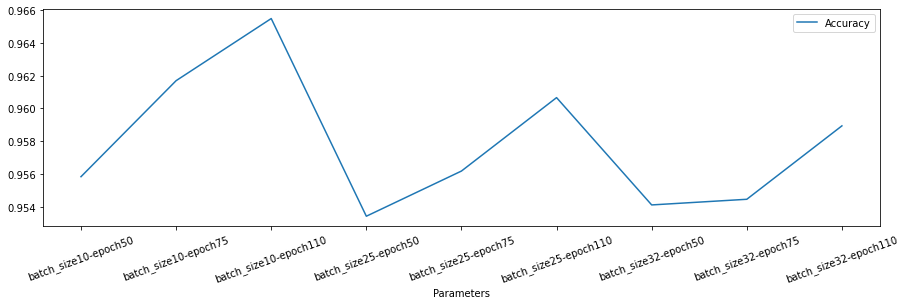

In [165]:
print(GSResultsData.sort_values(by='Accuracy', ascending=False).head(1))
GSResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line', rot=20)

## B- ANN Model Training

Training the model with best batch size and epoch given by grid search. There are 3 hidden layers with 'relu', 'relu','sigmoid' activation functions. There is 1 input and output layer.

  Activation function makes transformation on variables. Otherwise, a neural network model would be just a linear regression. If we gonna use linear regression, it won be strong enough to model data efficiently. Number of layers wont be meaningful and model will be like singel layer model.  
  
  In "Binary Classifier", sigmoid function shoul be used, in the last layer with one node. Because, output need to transform 0-1 binary form. Sigmoid will transform values, dependent on a probability value. It is not common to use sigmoid function in hidden layers because of the drawbacks like 'saturation of the gradients problem",slow convergence etc.  
  
  In the 'multiclass classification', softmax activation function in per class one node.  
  In the 'multilabel classification', sigmoid activation function in per class one node.  
  In "Hidden Layers" non linear functions shoul be used as the activation function. ReLU is the most populer one and if results not sattisfying, leaky ReLU is an option.
  
  Functions to only use in hidden layers: ReLU, variants of ReLU, Tanh, swish and hard swish functions.
  
  

In [151]:
def create_network():
    model = keras.models.Sequential([
        keras.layers.Dense(100, activation='relu', input_dim=57),
        keras.layers.Dense(66, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

### Early Stopping


The goal of "early stoppig" is avoid overfitting of the training dataset. It can also cause underfitting, so implementation of this process is very important.

monitor.: Monitors the performance, 'loss function' during training. 
patience.: How many epochs later training will be stoped if there is no improvement.  
min_delta.: It is a parameter define min number of change to qualify as improvement. If it is less than "min_delta", it wont qualify as improvement.  
mode.: There are 3 settings; auto, min, max. Auto make automatic inferred for monitored value. Min will stopped when monitored value stop decreasing. Max will stopped when monitored value stop increasing.  

As we can see from "C. ANN Model With Standartized Dataset" part, early stopping work well. Avoiding overfitting by stoping training early.


https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

### Learning Rate
If the learning rate is too low, it makes many updates untill the min point.
If the learning rate is too high, it make updates with big steps and leads divergent behaviour.
If the learning rate is just right,it quickly reach the optimal point.

Model trained with '0.005' and '0.001' learning rate and the results shows that '0.001'gives better solution.

In [166]:
def evaluate(model, input_train, output_train):
    model.summary()
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(input_train, output_train, batch_size=10, epochs=110, validation_split=.1,
                       callbacks=[keras.callbacks.EarlyStopping(
                           monitor='val_accuracy', 
                           patience=10, 
                           min_delta=0.001, 
                           mode='max')])

    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('accuracy model')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()
    
    return model

Model: "sequential_108"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_324 (Dense)           (None, 100)               5800      
                                                                 
 dense_325 (Dense)           (None, 66)                6666      
                                                                 
 dense_326 (Dense)           (None, 1)                 67        
                                                                 
Total params: 12,533
Trainable params: 12,533
Non-trainable params: 0
_________________________________________________________________
Epoch 1/110
290/290 [==============================] - 2s 5ms/step - loss: 0.3104 - accuracy: 0.8844 - val_loss: 0.1958 - val_accuracy: 0.9379
Epoch 2/110
290/290 [==============================] - 1s 3ms/step - loss: 0.1900 - accuracy: 0.9293 - val_loss: 0.1808 - val_accuracy: 0.9348
Epoch 3/110
290/290 [=====

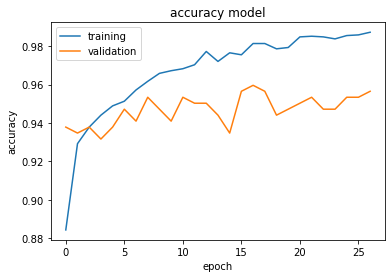

44/44 [==============================] - 0s 3ms/step


In [167]:
model= create_network()
model2=evaluate(model, x_train, y_train)
model3= model2.predict(x_test)

In [168]:
#sklearn to convert probability to a class
model_ann=[]
for variable in model3:  
    
    if variable<0.5:
        model_ann.append(0)
    else:
        model_ann.append(1)

### C. ANN Model With Unscaled Dataset

Model: "sequential_109"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_327 (Dense)           (None, 100)               5800      
                                                                 
 dense_328 (Dense)           (None, 66)                6666      
                                                                 
 dense_329 (Dense)           (None, 1)                 67        
                                                                 
Total params: 12,533
Trainable params: 12,533
Non-trainable params: 0
_________________________________________________________________
Epoch 1/110
290/290 [==============================] - 3s 5ms/step - loss: 1.5681 - accuracy: 0.7198 - val_loss: 0.4952 - val_accuracy: 0.8758
Epoch 2/110
290/290 [==============================] - 1s 5ms/step - loss: 0.9784 - accuracy: 0.8099 - val_loss: 0.5044 - val_accuracy: 0.8602
Epoch 3/110
290/290 [=====

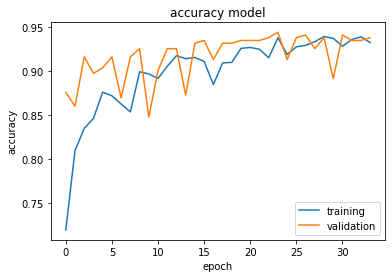

44/44 [==============================] - 0s 2ms/step


In [169]:
model_unscaled= create_network()
model_evaluated_unscaled=evaluate(model_unscaled, x_train_unscaled, y_train_unscaled)
model_unscaled_predicted= model_evaluated_unscaled.predict(x_test_unscaled)

As we can see from the accuracy model plot, training accuracy score keep increasing. However, validation score already stop increasing early stages of the training. It could cause overfitting in case early stopping havent been used.

In [170]:
model_ann_unscaled=[]
for variable in model_unscaled_predicted:  
    if variable<0.5:
        model_ann_unscaled.append(0)
    else:
        model_ann_unscaled.append(1)

## D- ANN Scaled and Unscaled Data Comparison

In [171]:
print('ANN model Accuracy Score: {:.2f}\n'.format(accuracy_score(y_test, model_ann)))
print('ANN model unsclaed Accuracy Score: {:.2f}'.format(accuracy_score(y_test_unscaled, model_ann_unscaled)))

ANN model Accuracy Score: 0.95

ANN model unsclaed Accuracy Score: 0.92


As we can see from the results, model with scaled dataset shows better accuracy than model with unscaled dataset.

# 7. Evaluation

In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

## 7.1 Confusion Matrix

Confusion matrix is one of the performance metrics for classification algorithm. There are 4 metrics "tp", "tn", "fp", "fn". True Positives and True Negatives are the ones we would like to see more than False Positives and False Negatives. False Positives and False Negative are types of errors.

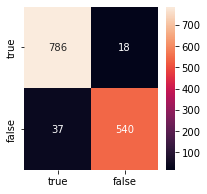

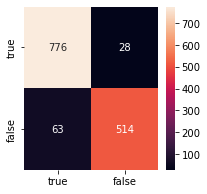

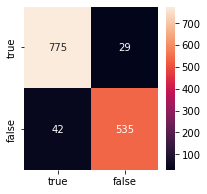

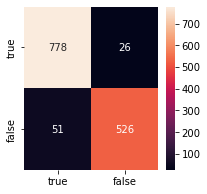

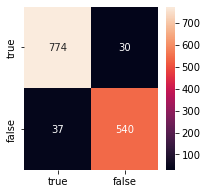

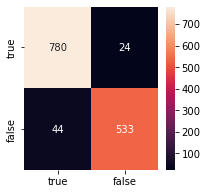

In [172]:
for clf in (model_rf_, model_svc_, model_ada_, vot_clf_, model_gb_, model_ann):

    name=clf.__class__.__name__
    confusion=confusion_matrix(y_test, clf)
    
    df_cm = pd.DataFrame(confusion, index = ["true",'false'],
                  columns = ["true",'false'])
    plt.figure(figsize = (3,3))
    sb.heatmap(df_cm, annot=True, fmt='g')

## 7.2 Cross Validation Score

As we can see from the sklearn documentation linked below, for classification problems there are multiple validation scorings. Cross Validation is one of them. It is a method can be employed on classification, clustring, regression problems to estimate overall accuracy. Specifically for classification problems for cross validation score there are metrics such as ‘f1’, 'precision’, ‘recall’. All metrics shows a score between 0 and 1. Results are accepted better when getting close to 1.

To calculate F1 score we use both precision and recall (F1 = 2 * (precision * recall) / (precision + recall).  
To calculate Precision score we use formulation with both "true positives" and "false positives" (tp / (tp + fp)). How many of positive predicted ones are really postives.  
To calculate Recall score we use formulation with both "true positives" and "false negatives" tp / (tp + fn). From all positives, how many predicted correctly.

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [173]:
for clf in (model_rf_, model_svc_, model_ada_, vot_clf_, model_gb_, model_ann):
    name=clf.__class__.__name__
    #names=["model_rf_"," model_svc_", "model_ada_", "vot_clf_"]
    print("\n",name)
    print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, clf)))

    print('Micro Precision: {:.2f}'.format(precision_score(y_test, clf, average='micro')))
    print('Macro Precision: {:.2f}'.format(precision_score(y_test, clf, average='macro')))
    print('Weighted Precision: {:.2f}\n'.format(precision_score(y_test, clf, average='weighted')))
    
    print('Micro Recall: {:.2f}'.format(recall_score(y_test, clf, average='micro')))
    print('Macro Recall: {:.2f}'.format(recall_score(y_test, clf, average='macro')))
    print('Weighted Recall: {:.2f}\n'.format(recall_score(y_test, clf, average='weighted')))
    
    print('Micro F1-score: {:.2f}'.format(f1_score(y_test, clf, average='micro')))
    print('Macro F1-score: {:.2f}'.format(f1_score(y_test, clf, average='macro')))  
    print('Weighted F1-score: {:.2f}\n'.format(f1_score(y_test, clf, average='weighted')))


 ndarray

Accuracy: 0.96

Micro Precision: 0.96
Macro Precision: 0.96
Weighted Precision: 0.96

Micro Recall: 0.96
Macro Recall: 0.96
Weighted Recall: 0.96

Micro F1-score: 0.96
Macro F1-score: 0.96
Weighted F1-score: 0.96


 ndarray

Accuracy: 0.93

Micro Precision: 0.93
Macro Precision: 0.94
Weighted Precision: 0.93

Micro Recall: 0.93
Macro Recall: 0.93
Weighted Recall: 0.93

Micro F1-score: 0.93
Macro F1-score: 0.93
Weighted F1-score: 0.93


 ndarray

Accuracy: 0.95

Micro Precision: 0.95
Macro Precision: 0.95
Weighted Precision: 0.95

Micro Recall: 0.95
Macro Recall: 0.95
Weighted Recall: 0.95

Micro F1-score: 0.95
Macro F1-score: 0.95
Weighted F1-score: 0.95


 ndarray

Accuracy: 0.94

Micro Precision: 0.94
Macro Precision: 0.95
Weighted Precision: 0.94

Micro Recall: 0.94
Macro Recall: 0.94
Weighted Recall: 0.94

Micro F1-score: 0.94
Macro F1-score: 0.94
Weighted F1-score: 0.94


 ndarray

Accuracy: 0.95

Micro Precision: 0.95
Macro Precision: 0.95
Weighted Precision: 0.95

Mic

In [174]:
print('\nCLASSIFICATION REPORT\n\n')
for clf in (model_rf_, model_svc_, model_ada_, vot_clf_, model_gb_, model_ann):
    
    name=clf.__class__.__name__
    print(name,classification_report(y_test, clf))


CLASSIFICATION REPORT


ndarray               precision    recall  f1-score   support

           0       0.96      0.98      0.97       804
           1       0.97      0.94      0.95       577

    accuracy                           0.96      1381
   macro avg       0.96      0.96      0.96      1381
weighted avg       0.96      0.96      0.96      1381

ndarray               precision    recall  f1-score   support

           0       0.92      0.97      0.94       804
           1       0.95      0.89      0.92       577

    accuracy                           0.93      1381
   macro avg       0.94      0.93      0.93      1381
weighted avg       0.93      0.93      0.93      1381

ndarray               precision    recall  f1-score   support

           0       0.95      0.96      0.96       804
           1       0.95      0.93      0.94       577

    accuracy                           0.95      1381
   macro avg       0.95      0.95      0.95      1381
weighted avg       0.95  

In [175]:
#class_name=[]
score_precision=[]
score_f1=[]
score_recall=[]
score_accuracy=[]
for clf in (model_rf_, model_svc_, model_ada_, vot_clf_, model_gb_, model_ann):

    score_precision.append(precision_score(y_test, clf, average='weighted'))
    score_f1.append(f1_score(y_test, clf, average='weighted'))
    score_recall.append(recall_score(y_test, clf, average='weighted'))
    score_accuracy.append(accuracy_score(y_test, clf))
    #class_name.append(clf.__class__.__name__)
    class_name=["random forest","SVC","adaboost","vooting","gradient boosting","ANN"]
    
df = pd.DataFrame(list(zip(class_name,score_precision, score_f1, score_recall ,score_accuracy)),
               columns =['model', 'precision','f1','recall','accuracy'])

df.sort_values(by=['precision'],ascending=False)

,model,precision,f1,recall,accuracy
0,random forest,0.960349,0.960073,0.960174,0.960174
4,gradient boosting,0.951449,0.951442,0.951484,0.951484
5,ANN,0.950910,0.950629,0.950760,0.950760
2,adaboost,0.948588,0.948501,0.948588,0.948588
3,vooting,0.944504,0.944053,0.944243,0.944243
1,SVC,0.934700,0.933777,0.934106,0.934106


# 8. Conclusion

In the data frame, there was 57 word frequency column and 1 label column as binary classification which defines spam (1) or not spam (0). After EDA  it was found that the label was not balanced. After correlation analyses, it was seen that one of the variables was correlated with another variable. Variables were in different scales, so preprocessing "standardization" was applied to the data frame.  

In the random forest we did "Hyper Parameter Tuning" and compared results with default parameters. Results showed that hyperparameter tuning changed the 0.95 accuracy score to 0.96 which made random forest the best model in the validation scoring part between all models. In ANN hyperparameter tuning 10 batch size, 110 epoch parameters showed better accuracy. After the ANN model was trained with both scaled and unscaled datasets with found parameters as the result scaled dataset gave a "0.03" better solution than the unscaled dataset. Early stopping is used to stop training when it shows no improvement in the validation set. In the ANN part, early stopping is applied when there is no improvement in 10 epochs (patient). After model training results show that hyperparameter tuning and standardization increased model accuracy.  

In the validation part, the difference between the actual value and the predicted value is visualized with a confusion matrix. Then cross-validation metrics such as accuracy, f1, precision, and recall are applied to the model. In conclusion, the random forest gave the best results with a 0.96 accuracy score. After the random forest, gradient boosting and ANN gave good scores with 0.95 accuracy scores.